# Distribution of gene expression levels

The goal is to estimate quantiles that characterize how a population of promoter sequences affects gene expression. Vaishnav et al. (1) recently trained a state-of-the-art transformer model to predict the expression level of a particular gene induced by a promoter sequence. They used the model's predictions to study the effects of promoters; for example, by assessing how quantiles of predicted expression levels differ between different populations of promoters. This notebook shows how the predictions used by Vaishnav et al. can be leveraged to estimate different quantiles of gene expression levels induced by native yeast promoters with higher statistical power.

1. E. D. Vaishnav, C. G. de Boer, J. Molinet, M. Yassour, L. Fan, X. Adiconis, D. A. Thompson, J. Z. Levin, F. A. Cubillos, A. Regev, The evolution, evolvability and engineering of gene regulatory DNA. Nature 603(7901), 455–463 (2022).

### Import necessary packages

In [1]:
import numpy as np
from ppi_py.datasets import load_dataset
from ppi_py import analyze_dataset, plot_cpp

Split 1: Y range from 4.26895398654981 to 9.50551428638104
Split 2: Y range from 14.4930805328954 to 14.8241632854723
Split 3: Y range from 15.5970666529087 to 4.67757284797322
Split 4: Y range from 4.67805458955475 to 8.60497616939116
Split 5: Y range from 8.60540238484632 to 16.1135558882277
分组： 1
带标签的样本量： 770
不带标签的样本量： 11460
分组： 2
带标签的样本量： 770
不带标签的样本量： 11460
分组： 3
带标签的样本量： 770
不带标签的样本量： 11460
分组： 4
带标签的样本量： 770
不带标签的样本量： 11460
分组： 5
带标签的样本量： 770
不带标签的样本量： 11460
imputed var: [8.40882878e-05 8.40882878e-05 8.40882878e-05 ... 8.40882878e-05
 8.40882878e-05 8.40882878e-05]
rectifier var [2.87192223e-05 2.87192223e-05 2.87192223e-05 ... 2.87192223e-05
 2.87192223e-05 2.87192223e-05]
带标签的样本量： 3850
不带标签的样本量： 57300

最终结果：
真实 theta: 5.650311615722635
CPP intervals: [array([5.26047361, 6.36592355]), array([4.77605475, 6.26181537]), array([2.63779464, 2.94369589]), array([4.11829809, 4.48327629]), array([10.93748499, 11.34783572])]
组合数据的置信区间: [5.38738134 5.9142403 ]
联邦聚合后的置信区间: [5.24301233 6.

meta NOT subset; don't know how to subset; dropped


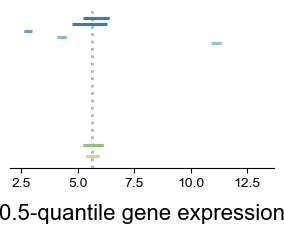

In [2]:
# 示例调用
dataset_name = "gene_expression"
data = load_dataset('./data/', dataset_name)
Y_total = data["Y"]
Yhat_total = data["Yhat"]

alpha = 0.05

method = "quantile"

# dataset_dist = 'IID'
dataset_dist = 'Non-IID'

grid = np.concatenate([Y_total, Yhat_total], axis=0)
grid = np.linspace(grid.min(), grid.max(), 5000)

# num_ratio = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
num_ratio = [1, 1, 1, 1, 1]  # 数据量分布平衡
# num_ratio = [1,2,3,3,1]  # 数据量分布不平衡

# 计算标注真实值、各节点上、组合数据后和FL后的平均值cpp
true_theta, cpp_intervals, ppi_ci_combined, mean_cpp = analyze_dataset(alpha, None, Y_total, Yhat_total, dataset_dist,
                                                                            num_ratio, method, grid)
# 画图
file_name = dataset_dist + '-' + dataset_name + '.pdf'
xlim = [2, 13.7]
ylim = [0, 1.0]
title = "0.5-quantile gene expression"
plot_cpp(true_theta, cpp_intervals, ppi_ci_combined, mean_cpp, file_name, xlim, ylim, title)